In [14]:
import pandas as pd
import numpy as np
import matplotlib

In [15]:
pedals = pd.read_csv(r'C:\Users\roast\Desktop\reddit_guitarpedals_1000.csv')

In [16]:
pedals.columns

Index(['subreddit', 'title', 'selftext', 'upvote_ratio', 'ups', 'downs',
       'score', 'num_comments', 'created_utc', 'id', 'kind', 'url',
       'thumbnail'],
      dtype='object')

In [17]:
pedals.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,num_comments,created_utc,id,kind,url,thumbnail
0,guitarpedals,First Pedalboard (reconfigured) I redistribute...,NaN,1.00,2,0,2,2,06/12/2022 17:21:49,vavtca,t3,https://i.redd.it/aqc85ox2c9591.png,https://a.thumbs.redditmedia.com/4lQdyYjEWH_da...
1,guitarpedals,never really listened to Calvin Harris but I l...,NaN,1.00,1,0,1,1,06/12/2022 17:18:47,vavr2d,t3,https://youtu.be/FFV6t4Dl_zQ,https://a.thumbs.redditmedia.com/75IxJ6tQug7hZ...
2,guitarpedals,Boss RC-300 Loop Pedals no longer working?,"Hello Everyone,\n\nI've owned a Boss RC-300 pe...",0.67,1,0,1,1,06/12/2022 16:59:31,vavc8h,t3,https://www.reddit.com/r/guitarpedals/comments...,self
3,guitarpedals,What’s your favorite effect??,Mine’s the Wah,0.67,2,0,2,23,06/12/2022 16:24:51,vauluw,t3,https://www.reddit.com/r/guitarpedals/comments...,self
4,guitarpedals,Help me decide which pedal to get,Hey guys I need your help deciding if I should...,0.81,3,0,3,8,06/12/2022 16:18:58,vauhff,t3,https://www.reddit.com/r/guitarpedals/comments...,self


In [18]:
#Changing dtypes of all columns
pedals['created_utc'] = pd.to_datetime(pedals['created_utc'])
pedals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   subreddit     994 non-null    object        
 1   title         994 non-null    object        
 2   selftext      467 non-null    object        
 3   upvote_ratio  994 non-null    float64       
 4   ups           994 non-null    int64         
 5   downs         994 non-null    int64         
 6   score         994 non-null    int64         
 7   num_comments  994 non-null    int64         
 8   created_utc   994 non-null    datetime64[ns]
 9   id            994 non-null    object        
 10  kind          994 non-null    object        
 11  url           994 non-null    object        
 12  thumbnail     994 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 101.1+ KB


In [19]:
# Removing punctuations from every title
import string
pedals_titles = []
for i in range(len(pedals['title'])):
    words = pedals['title'][i].lower().split()

    words = [''.join(letter for letter in word if letter not in string.punctuation) for word in words]
    pedals_titles.append(words)

In [20]:
# {word: frequency}
# Removing punctuation
# Removing symbols
# all lower case

word_freq_title = {}

for title in range(len(pedals_titles)):
    for word in pedals_titles[title]:
        if word not in word_freq_title:
            word_freq_title[word] = 0
        word_freq_title[word] += 1

In [22]:
#First 10 k:v in dict
dict(list(word_freq_title.items())[0: 10])

{'first': 46,
 'pedalboard': 59,
 'reconfigured': 1,
 'i': 138,
 'redistributed': 1,
 'my': 142,
 'pedals': 103,
 'based': 3,
 'on': 86,
 'advise': 1}

In [77]:
#Removing stop word
stop_words = ['a','an','and','are','as','be','by','by',	'for','from','has','he','in','is','it','its',
	'of','on','that','the',	'to','was',	'were','will','with','have','am', 'my', 'i', 'this', 'you', 'what', 
    'but', 'or', 'do', 'can']

title_dict = {}
for k, v in word_freq_title.items():
    if k not in stop_words:
        title_dict[k] = v
title_dict.pop('') #removing ' ' blank in dict

123

In [101]:
# Sorting the frequency for 
kv = ((value, key) for (key,value) in title_dict.items())
sorted_title = sorted(kv, reverse=True)
sorted_title[0:5]

[(199, 'pedal'), (160, 'npd'), (117, 'board'), (103, 'pedals'), (62, 'boss')]

In [78]:
type(title_dict)

dict

In [80]:
title_df = pd.DataFrame(title_dict.values(), index=title_dict.keys(), columns=['Frequency'])
title_df.index.name = 'Word'
title_df.head()

,Frequency
Word,
first,46
pedalboard,59
reconfigured,1
redistributed,1
pedals,103


In [81]:
title_df.to_csv(r'C:\Users\roast\Desktop\gp_title_freq.csv', index=True)

### Pandas

In [133]:
#Pandas dataframe and analysis
#First, title analysis. Which pedals/brands were mentioned the most? 
import matplotlib.pyplot as plt

df_title = pd.DataFrame(sorted_title, columns=['Frequency', 'Word'])
df_title.head()


,Frequency,Word
0,199,pedal
1,160,npd
2,117,board
3,103,pedals
4,62,boss


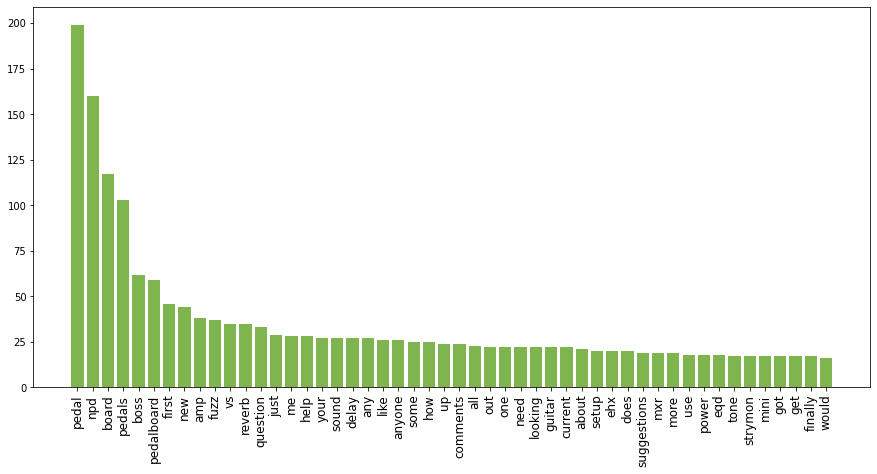

In [158]:
#Top 50 words mentioned
title_50 = df_title.iloc[0:50]
x = title_50['Word']
y = title_50['Frequency']


plt.xticks(fontsize = 12, rotation='vertical')
plt.gcf().set_size_inches(15, 7)
plt.bar(x,y, color = '#7eb54e')
plt.show()


### Pandas - Brand Mention Frequncy
Top guitar pedal brands:

BOSS,
Strymon,
Electro Harmonix (Electro-Harmonix, EHX),
TC Electronic,
Walrus Audio (Walrus),
Eventide,
DigiTech,
Zoom,
Earthquaker,
Dunlop,
Fender,
MXR, Catalinbread,
Donner, SubZero,
Keeley, Behringer, Fulltone, Joyo, Mooer, Universal Audio, Pro Co Sound


Klon Centaur - Most talked about

In [187]:
pedal_brands = ['BOSS', 'Strymon', 'Electro', 'Harmonix', 'Electro-Harmonix', 'Electroharmonix', 'EHX', 'TC Electronic', 
'Walrus','Eventide','DigiTech','Zoom','Earthquaker','Jim','Dunlop',
'Fender','MXR', 'Catalinbread','Donner', 'SubZero','Keeley', 'Behringer', 'Fulltone', 
'Joyo', 'Mooer', 'Universal', 'rat']

#lower case
for i in range(len(pedal_brands)):
   pedal_brands[i] = pedal_brands[i].lower()

In [188]:
print(pedal_brands)

['boss', 'strymon', 'electro', 'harmonix', 'electro-harmonix', 'electroharmonix', 'ehx', 'tc electronic', 'walrus', 'eventide', 'digitech', 'zoom', 'earthquaker', 'jim', 'dunlop', 'fender', 'mxr', 'catalinbread', 'donner', 'subzero', 'keeley', 'behringer', 'fulltone', 'joyo', 'mooer', 'universal', 'rat']


In [192]:
#Most mentioned brands
df_title[df_title['Word'].isin(pedal_brands)].set_index('Word')

,Frequency
Word,
boss,62
ehx,20
mxr,19
strymon,17
walrus,14
keeley,10
mooer,8
digitech,8
joyo,7
